# Correlation Analysis


In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
import numpy as np
import seaborn as sn

import warnings
warnings.filterwarnings("ignore")

In [140]:
#!pip install nest_asyncio
import nest_asyncio
nest_asyncio.apply()

In [141]:
df = pd.read_csv('SeoulBikeData.csv', encoding= 'unicode_escape')

In [142]:
df.rename(columns={'Rented Bike Count': 'RBC', 'Temperature(°C)': 'Temp',
                   'Humidity(%)': 'Humidity', 'Wind speed (m/s)': 'Windspeed', 
                   'Visibility (10m)': 'Visibility', 'Dew point temperature(°C)': 'Dew Point',
                   'Solar Radiation (MJ/m2)' : 'Solar Radiation', 
                   'Rainfall(mm)' : 'Rainfall', 'Snowfall (cm)': 'Snowfall'
                  }, inplace=True)

In [143]:
def add_time_features(df):
    cet_index = df.Date
    df["month"] = cet_index.dt.month #month_name()
    df["is_weekend"] = ((pd.DatetimeIndex(df.Date).dayofweek) // 5 == 1).astype(int)
    df["weekday"] = cet_index.dt.dayofweek #day_name()
    #df["week"]= cet_index.dt.week
    df["year"] = cet_index.dt.year
    df["weekday_name"] = cet_index.dt.day_name()
    return df

In [144]:
df['Date'] = pd.to_datetime(df['Date'])
df = add_time_features(df)

Find correlations between features 

In [145]:
plt.rcParams['figure.figsize'] = [6, 4] # default = [6.0, 4.0]
plt.rcParams['figure.dpi']     = 100     # default = 72.0
plt.rcParams['font.size']      = 7.5     # default = 10.0

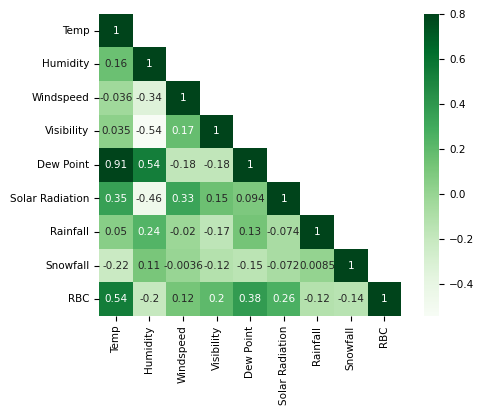

In [146]:
corrMatt = df[['Temp', 'Humidity', 'Windspeed', 'Visibility', 'Dew Point', 'Solar Radiation', 
               'Rainfall', 'Snowfall', 'RBC']].corr()

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()

sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True, cmap="Greens");

plt.savefig('./img/corr/corrMatt.jpg', dpi=300)


Correlation Matrix in most cases is not enough to get insights about features' hidden relationships. However in the figure above, We'll notice that:

There are some Positive correlation between:
y (Target Lable) and Hour
y (Target Lable) and Temperature
y (Target Lable) and Dew Point Temperature
Dew Point Temperature and Temperature and Humidity
There are some Negative correlation between:
y (Target Lable) and Humidity
Humidity and Solar Radiation
Humidity and Visibility
Humidity and Wind speed

In [147]:
correlations = df.corr(method='pearson')

highly_correlated = abs(correlations[correlations > 0.60])
print(highly_correlated[highly_correlated < 1.0].stack().to_string())

Temp        Dew Point     0.912798
Dew Point   Temp          0.912798
is_weekend  weekday       0.795729
weekday     is_weekend    0.795729


We will drop dew point temp as they is multicollinearity in temperature(°C) and dev point temperature(°C).

In [148]:
numeric_features = df.select_dtypes(exclude='object')

In [149]:
num_features = df[['RBC', 'Temp', 'Humidity', 'Windspeed', 'Visibility', 'Solar Radiation', 'Rainfall', 'Snowfall']]

Regression plot to know relation with our independent variable

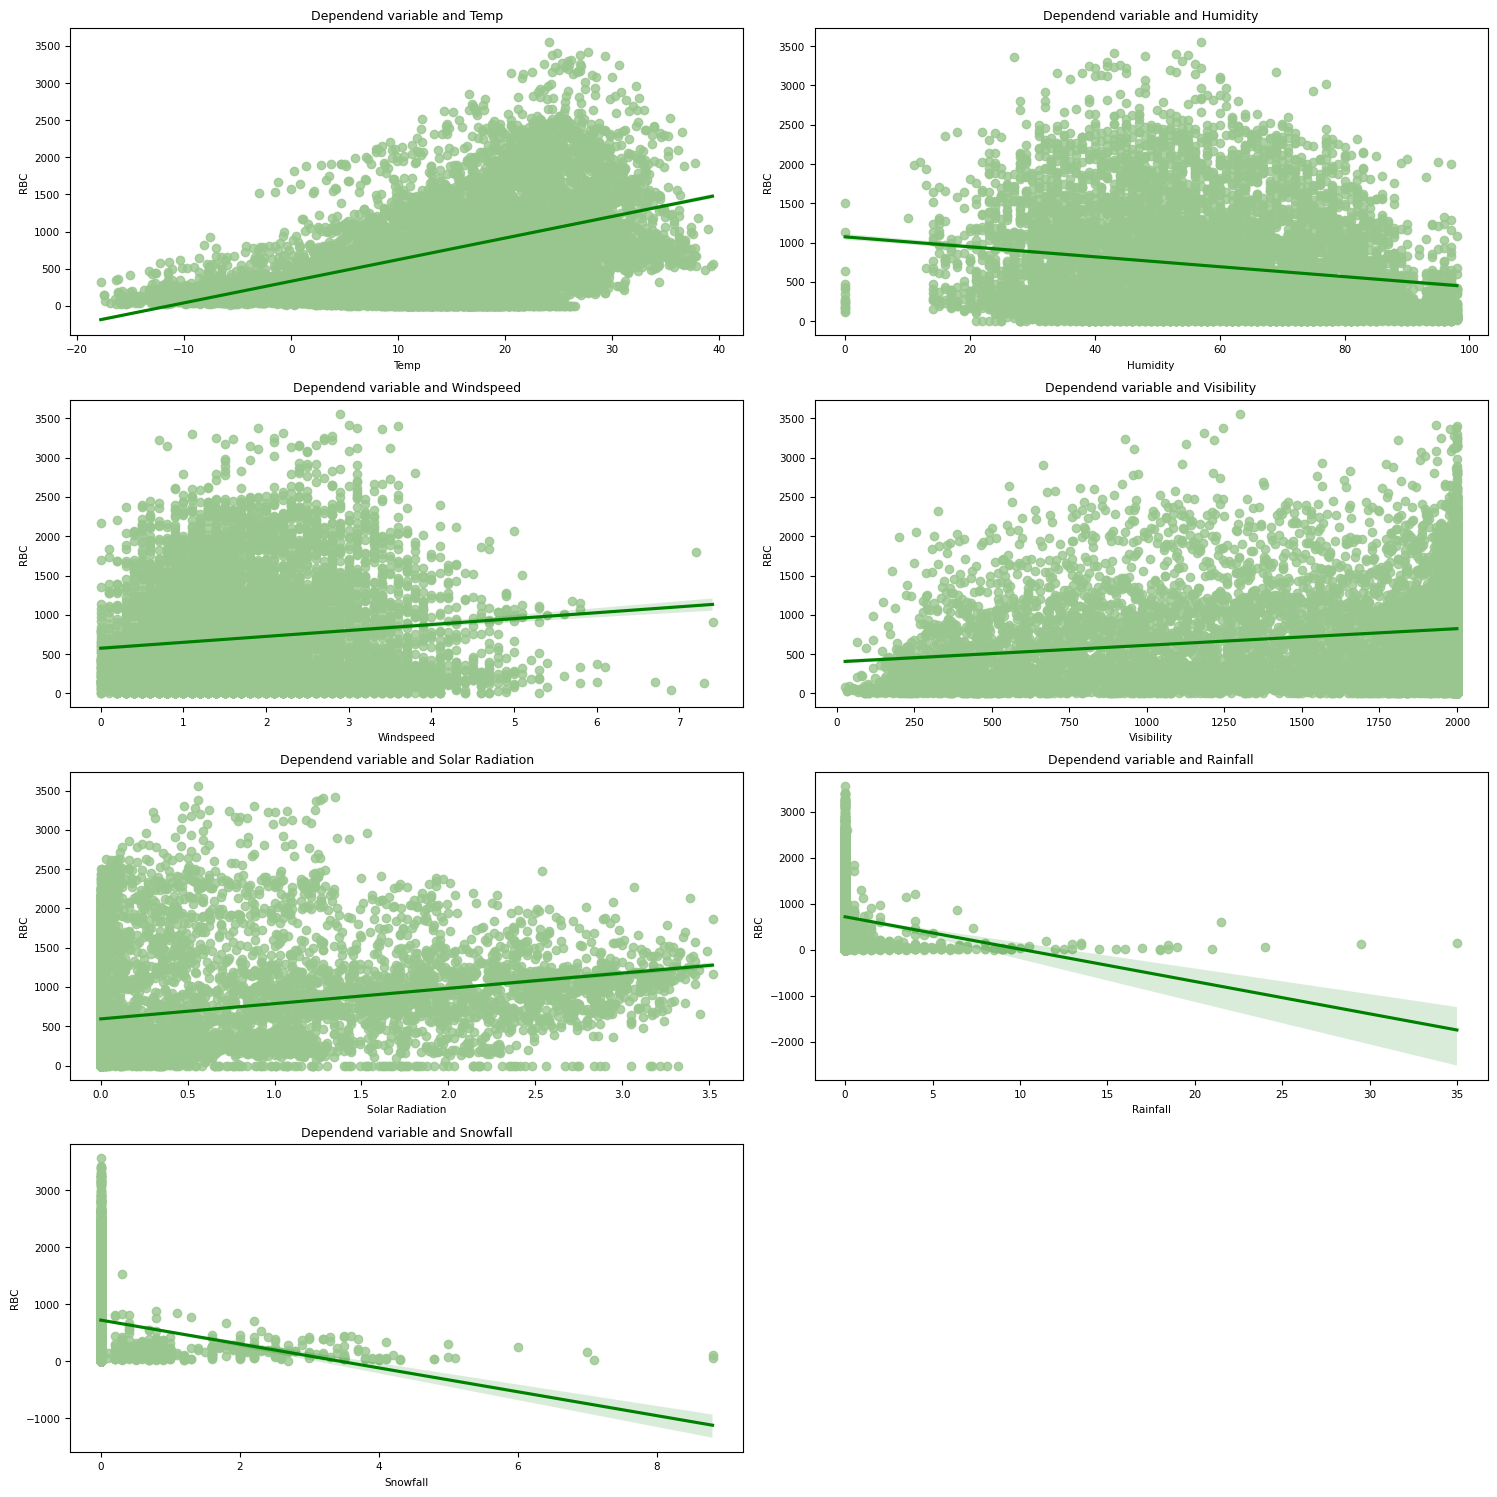

In [150]:
n=1
plt.figure(figsize=(15,15))
for i in num_features.columns:
    if i == 'RBC':
        pass
    else:
        plt.subplot(4,2,n)
        n+=1
        sns.regplot(df[i], df['RBC'],scatter_kws={"color": "#99C68E"}, line_kws={"color": "#008000"})
        plt.title(f'Dependend variable and {i}')
        plt.tight_layout()
        plt.savefig('./img/corr/Corr_var.jpg', dpi=300)


# Meteorological features

# Temp

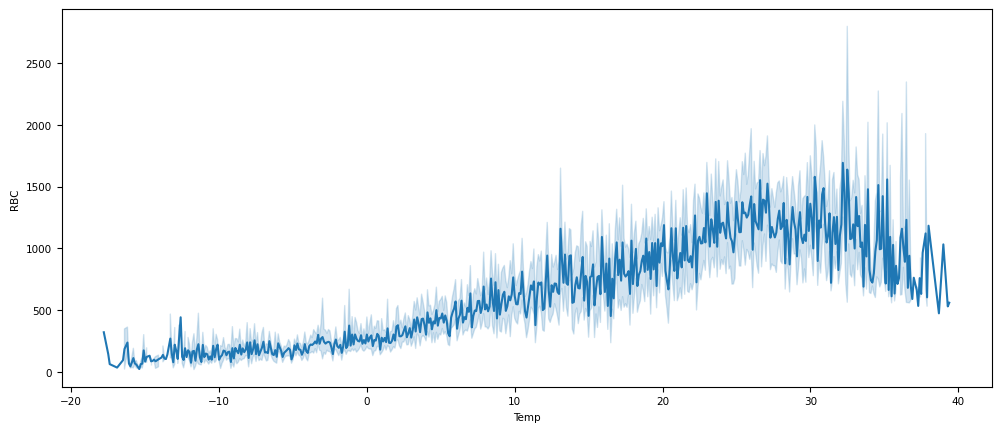

In [151]:
fig,ax = plt.subplots(figsize = (12,5))
ax = sns.lineplot(x=df['Temp'],y=df['RBC'])
plt.savefig('./img/corr/Temp_demand.jpg', dpi=300)


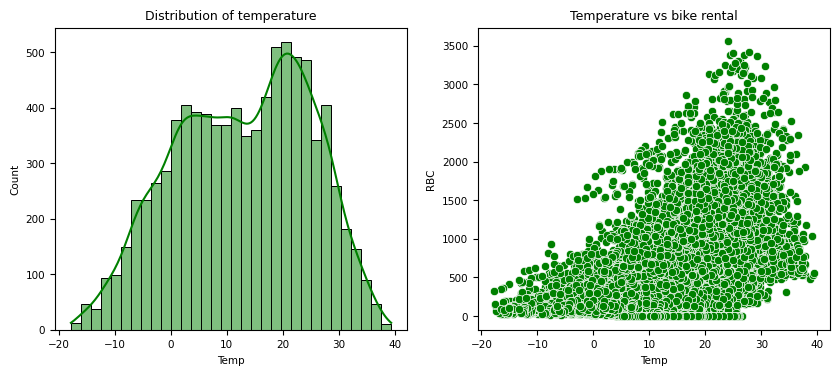

In [152]:
fig, axis = plt.subplots(1, 2, figsize=(10, 4))
plt.subplot(121)
plt.title('Distribution of temperature')
sns.histplot(df.Temp, kde=True, color="#008000")
plt.subplot(122)
plt.title('Temperature vs bike rental')
sns.scatterplot(x='Temp', y='RBC', data=df, color="#008000")
plt.savefig('./img/corr/Temp_subplot.jpg', dpi=300)


The number of bikes tend to be the maximum around the 25-35 degree celcius.

# Dew point temp


In [153]:
plt.rcParams['figure.figsize'] = [10, 4] # default = [6.0, 4.0]
plt.rcParams['figure.dpi']     = 100     # default = 72.0
plt.rcParams['font.size']      = 7.5     # default = 10.0

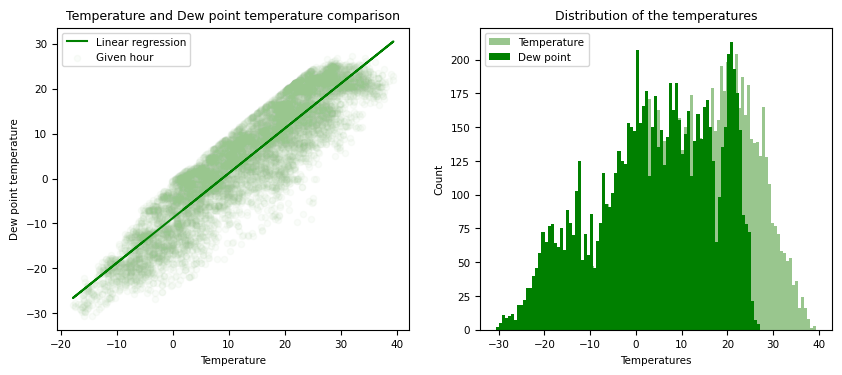

In [154]:
N = len(df) // 100

# tempature and dew point comparison
ax = plt.subplot2grid((1, 2), (0, 0), colspan=1)
df.plot(x='Temp', y='Dew Point', kind='scatter', color='#99C68E', alpha=0.05, ax=ax, label='Given hour')
# add regression line
x, y = df.Temp, df['Dew Point']
m, b = np.polyfit(x, y, 1)
ax.plot(x, m * x + b, color='#008000', label='Linear regression') 
# add legends
ax.set_title('Temperature and Dew point temperature comparison')
ax.set_xlabel('Temperature')
ax.set_ylabel('Dew point temperature')
ax.legend()

# Temperatures distributions
ax = plt.subplot2grid((1, 2), (0, 1), colspan=1)
ax.hist(x=df.Temp, bins=N, color='#99C68E', label='Temperature')
ax.hist(x=df['Dew Point'], bins=N, color='#008000', label='Dew point')
# add legends
ax.set_title('Distribution of the temperatures')
ax.set_xlabel('Temperatures')
ax.set_ylabel('Count')
ax.legend()


Dew point tempreture and tempreture are nearly identical to each other in effect on the target variable

# Visablity

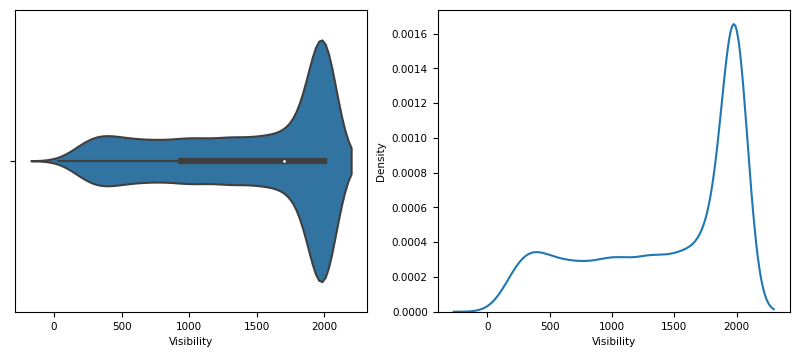

In [155]:
fig,ax = plt.subplots(1,2,)
sns.violinplot(ax=ax[0],x='Visibility',data = df);
sns.kdeplot(ax=ax[1],x='Visibility',data=df);

Visabilty data is centered around 2000 and most of the rents are at this range of visability

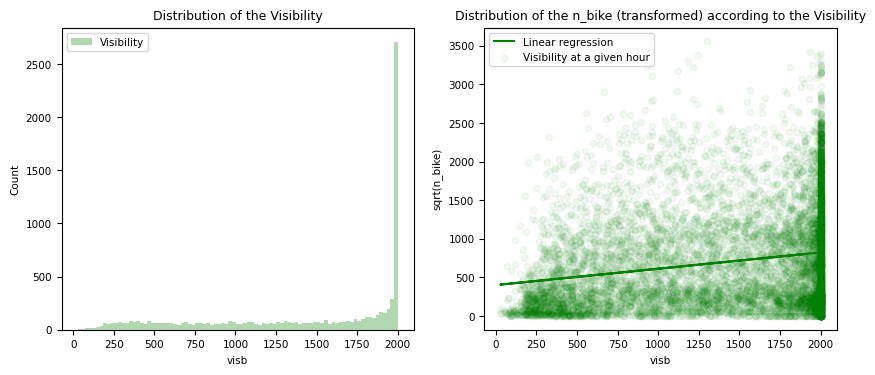

In [156]:
N = len(df) // 100

# Visibility distributions
ax = plt.subplot2grid((1, 2), (0, 0), colspan=1)
ax.hist(x=df.Visibility, bins=N, color='#008000', alpha=0.3, label='Visibility')
# add legends
ax.set_title('Distribution of the Visibility')
ax.set_xlabel('visb')
ax.set_ylabel('Count')
ax.legend()

# Visibility and rented bikes distribution
ax = plt.subplot2grid((1, 2), (0, 1), colspan=1)
df.plot(x='Visibility', y='RBC', kind='scatter', color='#008000', alpha=0.05, label='Visibility at a given hour', ax=ax)
# add regression line
x, y = df.Visibility, df.RBC
m, b = np.polyfit(x, y, 1)
ax.plot(x, m * x + b, color='#008000', label='Linear regression') 
# add legends
ax.set_title('Distribution of the n_bike (transformed) according to the Visibility')
ax.set_xlabel('visb')
ax.set_ylabel('sqrt(n_bike)')
ax.legend()
pass

As we can see, the Visibility is by default at 2000 which is weird to interpret as a maximum visibility. So I decide to change the visibility feature to Inverse_Visibility which reverts the distribution. 

In [157]:
df['Inverse_Visibility'] = df.Visibility.max() - df.Visibility
df = df.drop('Visibility', axis=1)

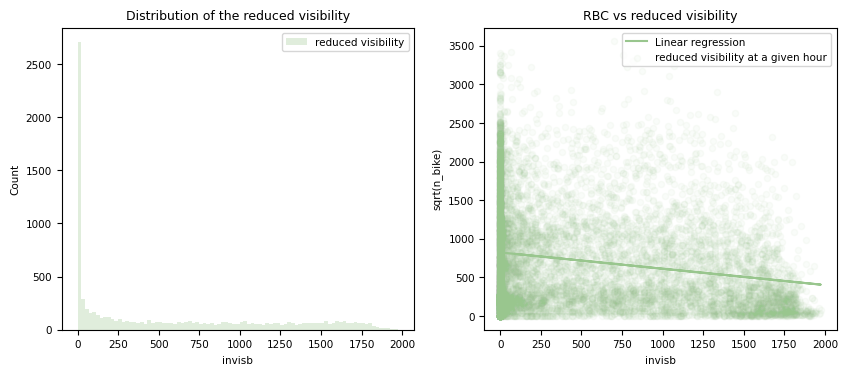

In [158]:
N = len(df) // 100

# reduced visibility distributions
ax = plt.subplot2grid((1, 2), (0, 0), colspan=1)
ax.hist(x=df.Inverse_Visibility, bins=N, color='#99C68E', alpha=0.3, label='reduced visibility')
# add legends
ax.set_title('Distribution of the reduced visibility')
ax.set_xlabel('invisb')
ax.set_ylabel('Count')
ax.legend()

# reduced visibility and rented bikes distribution
ax = plt.subplot2grid((1, 2), (0, 1), colspan=1)
df.plot(x='Inverse_Visibility', y='RBC', kind='scatter', color='#99C68E', alpha=0.05, label='reduced visibility at a given hour', ax=ax)
# add regression line
x, y = df.Inverse_Visibility, df.RBC
m, b = np.polyfit(x, y, 1)
ax.plot(x, m * x + b, color='#99C68E', label='Linear regression') 
# add legends
ax.set_title('RBC vs reduced visibility')
ax.set_xlabel('invisb')
ax.set_ylabel('sqrt(n_bike)')
ax.legend()
plt.savefig('./img/corr/Vis_subplot.jpg', dpi=300)

pass

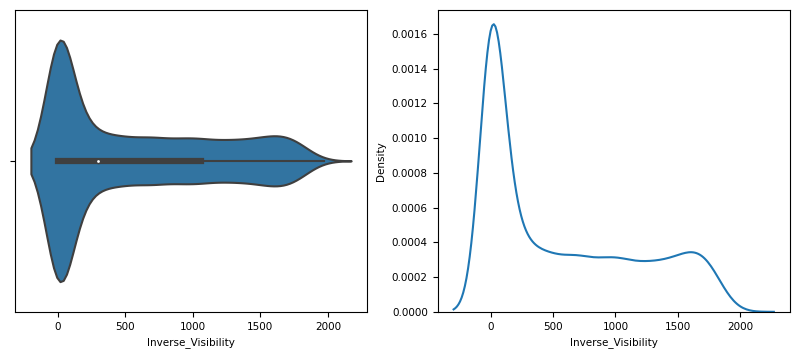

In [159]:
fig,ax = plt.subplots(1,2,)
sns.violinplot(ax=ax[0],x='Inverse_Visibility',data = df);
sns.kdeplot(ax=ax[1],x='Inverse_Visibility',data=df);

Now it is easier to interpret. The more the visibility is reduced, the less the bikes are rented.

# Humidity

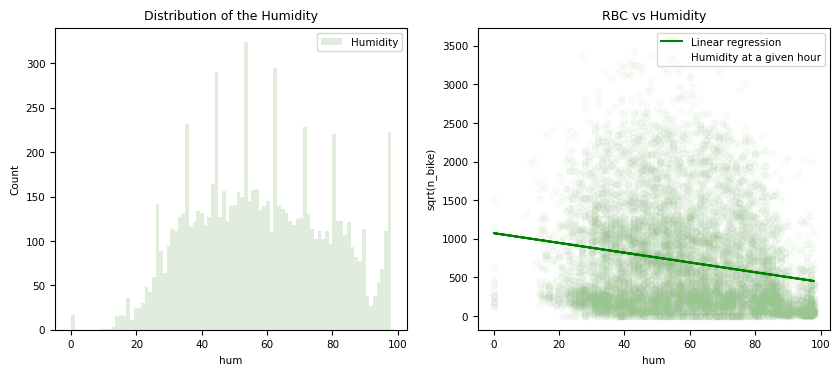

In [160]:
N = len(df) // 100

# Humidity distributions
ax = plt.subplot2grid((1, 2), (0, 0), colspan=1)
ax.hist(x=df.Humidity, bins=N, color="#99C68E", alpha=0.3, label='Humidity')
# add legends
ax.set_title('Distribution of the Humidity')
ax.set_xlabel('hum')
ax.set_ylabel('Count')
ax.legend()

# Humidity and rented bikes distribution
ax = plt.subplot2grid((1, 2), (0, 1), colspan=1)
df.plot(x='Humidity', y='RBC', kind='scatter', color='#99C68E', alpha=0.05, label='Humidity at a given hour', ax=ax)
# add regression line
x, y = df.Humidity, df.RBC
m, b = np.polyfit(x, y, 1)
ax.plot(x, m * x + b, color='#008000', label='Linear regression') 
# add legends
ax.set_title('RBC vs Humidity')
ax.set_xlabel('hum')
ax.set_ylabel('sqrt(n_bike)')
ax.legend()

plt.savefig('./img/corr/Hum_subplot.jpg', dpi=300)

pass

The more the humidity is low, the more the bike rider will feel confortable. It leads to more bike rented.



<AxesSubplot:xlabel='Humidity', ylabel='Density'>

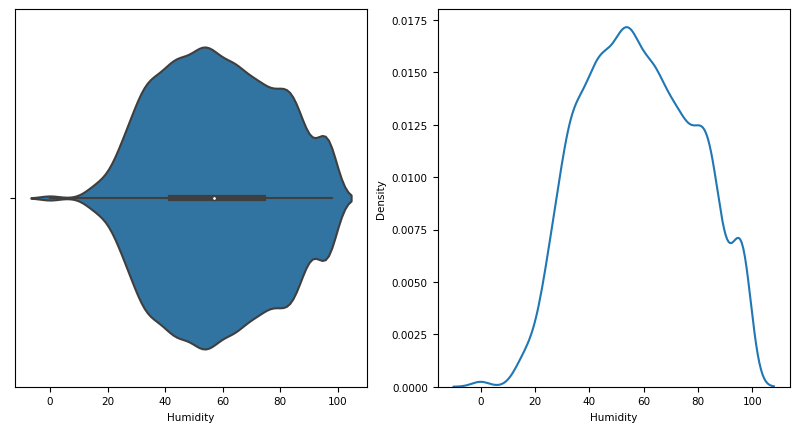

In [161]:
fig,ax = plt.subplots(1,2,figsize = (10,5))
sns.violinplot(ax =ax[0],x=df['Humidity'])
sns.kdeplot(ax = ax[1],x=df['Humidity'])

# Solar Radiation

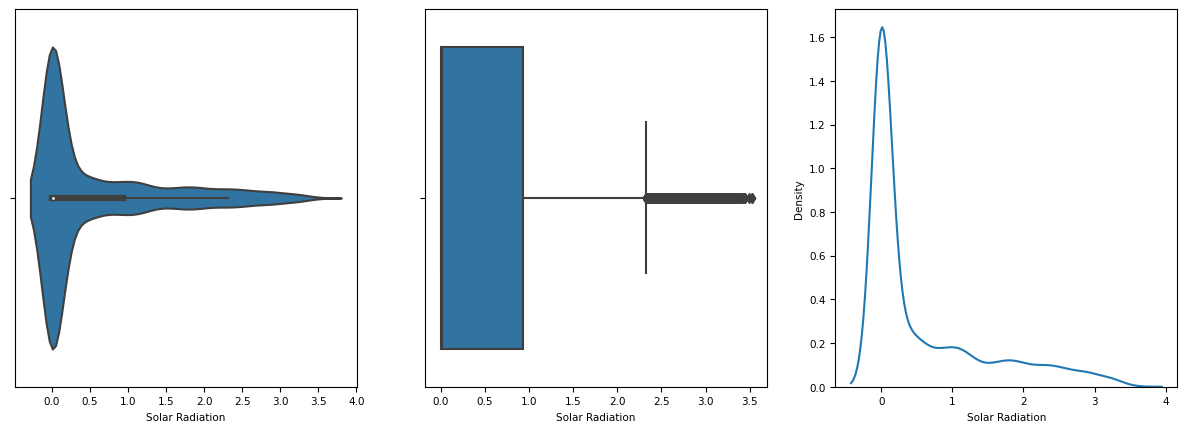

In [162]:
fig,ax = plt.subplots(1,3,figsize=(15,5))
sns.violinplot(ax = ax[0],x=df['Solar Radiation'])
sns.boxplot(ax=ax[1], x=df['Solar Radiation'])
sns.kdeplot(ax=ax[2],x='Solar Radiation',data = df);

Solar radiation is centered around aprox. 0.2, and have alot of outliers.
but these outliers are probably due to high tempretures in some days.

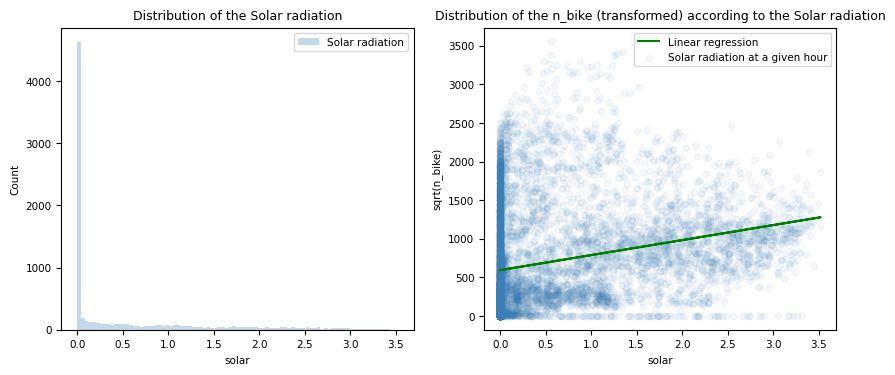

In [163]:
N = len(df) // 100

# Solar radiationdistributions
ax = plt.subplot2grid((1, 2), (0, 0), colspan=1)
ax.hist(x=df['Solar Radiation'], bins=N, color='#3b7fb9', alpha=0.3, label='Solar radiation')
# add legends
ax.set_title('Distribution of the Solar radiation')
ax.set_xlabel('solar')
ax.set_ylabel('Count')
ax.legend()

# Solar radiation and rented bikes distribution
ax = plt.subplot2grid((1, 2), (0, 1), colspan=1)
df.plot(x='Solar Radiation', y='RBC', kind='scatter', color='#3b7fb9', alpha=0.05, label='Solar radiation at a given hour', ax=ax)
# add regression line
x, y = df['Solar Radiation'], df.RBC
m, b = np.polyfit(x, y, 1)
ax.plot(x, m * x + b, color='#008000', label='Linear regression') 
# add legends
ax.set_title('Distribution of the n_bike (transformed) according to the Solar radiation')
ax.set_xlabel('solar')
ax.set_ylabel('sqrt(n_bike)')
ax.legend()
pass

In [164]:
df['Solar Radiation'] = np.sqrt(df['Solar Radiation'])

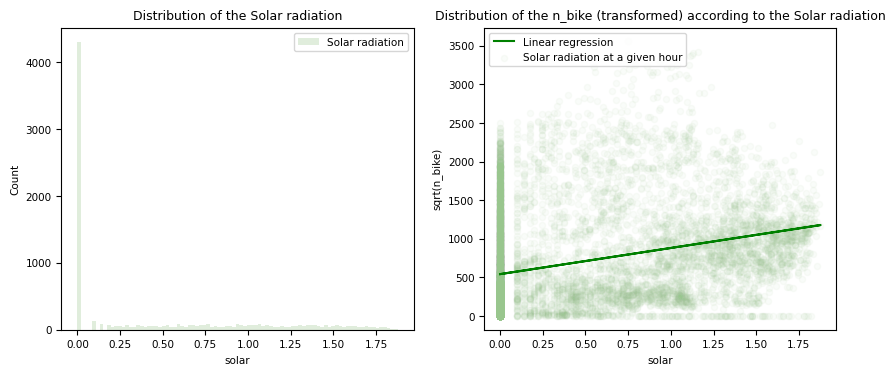

In [165]:
N = len(df) // 100

# Solar radiationdistributions
ax = plt.subplot2grid((1, 2), (0, 0), colspan=1)
ax.hist(x=df['Solar Radiation'], bins=N, color='#99C68E', alpha=0.3, label='Solar radiation')
# add legends
ax.set_title('Distribution of the Solar radiation')
ax.set_xlabel('solar')
ax.set_ylabel('Count')
ax.legend()

# Solar radiation and rented bikes distribution
ax = plt.subplot2grid((1, 2), (0, 1), colspan=1)
df.plot(x='Solar Radiation', y='RBC', kind='scatter', color='#99C68E', alpha=0.05, label='Solar radiation at a given hour', ax=ax)
# add regression line
x, y = df['Solar Radiation'], df.RBC
m, b = np.polyfit(x, y, 1)
ax.plot(x, m * x + b, color='#008000', label='Linear regression') 
# add legends
ax.set_title('Distribution of the n_bike (transformed) according to the Solar radiation')
ax.set_xlabel('solar')
ax.set_ylabel('sqrt(n_bike)')
ax.legend()
plt.savefig('./img/corr/Solar_subplot.jpg', dpi=300)

pass

So I will apply a square root transformation for three reasons :

I want to increase the gap between ~zero solar radiation and the other values
I want to keep the ~zero values as ~zero values, which is not possible with the log transformation

# Rain and snow-fall

The rainfall correspond (mm) to the rain fallen during the current hour. The more there are rain, the riskier riding is.

The rain fall is given by the rain fallen for a given our. So estimating the rain have a effect on dryness for 2 hours I will apply moving average of rainfall for the last 2 hours.

In [166]:
df['Rainfall'] = df.rolling(2, min_periods=1)['Rainfall'].mean()

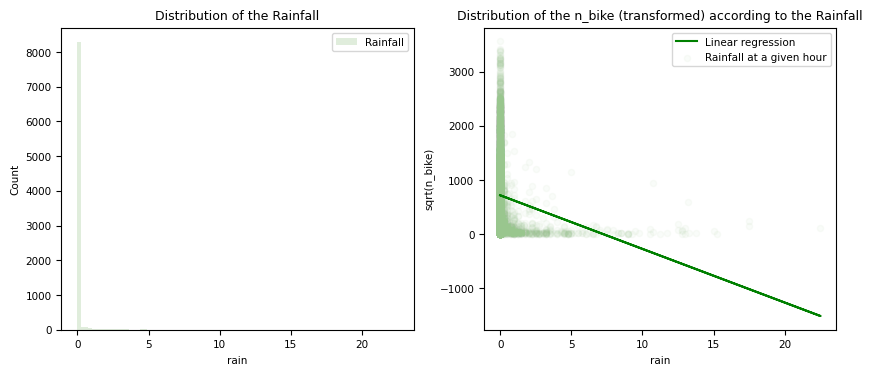

In [167]:
N = len(df) // 100

# Rainfall distributions
ax = plt.subplot2grid((1, 2), (0, 0), colspan=1)
ax.hist(x=df.Rainfall, bins=N, color='#99C68E', alpha=0.3, label='Rainfall')
# add legends
ax.set_title('Distribution of the Rainfall')
ax.set_xlabel('rain')
ax.set_ylabel('Count')
ax.legend()

# Rainfall and rented bikes distribution
ax = plt.subplot2grid((1, 2), (0, 1), colspan=1)
df.plot(x='Rainfall', y='RBC', kind='scatter', color='#99C68E', alpha=0.05, label='Rainfall at a given hour', ax=ax)
# add regression line
x, y = df.Rainfall, df.RBC
m, b = np.polyfit(x, y, 1)
ax.plot(x, m * x + b, color='#008000', label='Linear regression') 
# add legends
ax.set_title('Distribution of the n_bike (transformed) according to the Rainfall')
ax.set_xlabel('rain')
ax.set_ylabel('sqrt(n_bike)')
ax.legend()
pass

The plot showing the regression line is clearly indicates the more is it rainy, the less the bikes are used. 
Let's filter our plots on rainy hours.

In [168]:
df['dryness'] = 1 / (df.Rainfall + 1)
df = df.drop('Rainfall', axis=1)

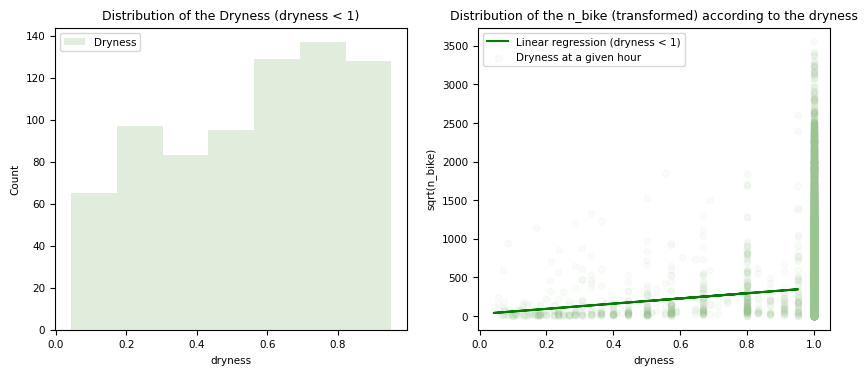

In [169]:
N = len(df[df.dryness < 1]) // 100

# Dryness distributions
ax = plt.subplot2grid((1, 2), (0, 0), colspan=1)
ax.hist(x=df[df.dryness < 1].dryness, bins=N, color='#99C68E', alpha=0.3, label='Dryness')
# add legends
ax.set_title('Distribution of the Dryness (dryness < 1)')
ax.set_xlabel('dryness')
ax.set_ylabel('Count')
ax.legend()

# Dryness and rented bikes distribution
ax = plt.subplot2grid((1, 2), (0, 1), colspan=1)
df.plot(x='dryness', y='RBC', kind='scatter', color='#99C68E', alpha=0.05, label='Dryness at a given hour', ax=ax)
# add regression line
x, y = df[df.dryness < 1].dryness, df[df.dryness < 1].RBC
m, b = np.polyfit(x, y, 1)
ax.plot(x, m * x + b, color='#008000', label='Linear regression (dryness < 1)') 
# add legends
ax.set_title('Distribution of the n_bike (transformed) according to the dryness')
ax.set_xlabel('dryness')
ax.set_ylabel('sqrt(n_bike)')
ax.legend()
plt.savefig('./img/corr/Rain_subplot.jpg', dpi=300)

pass

We can see that even if it rains a lot of korean rent bikes.

Rain fall has some meaningfull distribution along the time in opposite to snow fall that has a nearly constant distribution along the time.

# Snowfall
The snowfall correspond (mm) to the rain fallen during the current hour. The more there are rain, the riskier riding is.

The snow fall is given by the snow fallen for a given our. So estimating the snow have a effect on dryness for 8 hours in the city of Seoul I will apply moving average of snowfall for the last 8 hours.

In [170]:
df['Snowfall'] = df.rolling(8, min_periods=1)['Snowfall'].mean()

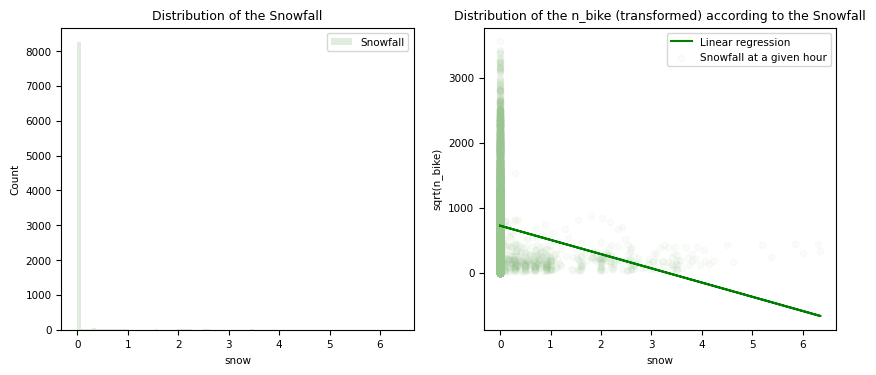

In [171]:
N = len(df) // 100

# Snowfall distributions
ax = plt.subplot2grid((1, 2), (0, 0), colspan=1)
ax.hist(x=df.Snowfall, bins=N, color='#99C68E', alpha=0.3, label='Snowfall')
# add legends
ax.set_title('Distribution of the Snowfall')
ax.set_xlabel('snow')
ax.set_ylabel('Count')
ax.legend()

# Snowfall and rented bikes distribution
ax = plt.subplot2grid((1, 2), (0, 1), colspan=1)
df.plot(x='Snowfall', y='RBC', kind='scatter', color='#99C68E', alpha=0.05, label='Snowfall at a given hour', ax=ax)
# add regression line
x, y = df.Snowfall, df.RBC
m, b = np.polyfit(x, y, 1)
ax.plot(x, m * x + b, color='#008000', label='Linear regression') 
# add legends
ax.set_title('Distribution of the n_bike (transformed) according to the Snowfall')
ax.set_xlabel('snow')
ax.set_ylabel('sqrt(n_bike)')
ax.legend()
plt.savefig('./img/corr/Snow_subplot.jpg', dpi=300)

pass

Yet looking more precisely, we see it is more a categorical variable. If there are 1 or 10 mm of snow, the number of bike rented seems to follow the same distribution. 

In [181]:
_df = df.copy()
_df['snowing'] = (_df.Snowfall > 0).astype(np.int)

# group by snowing to get box plot
groups = _df.groupby(by=['snowing'], sort=False).RBC
labels = ['snowing', 'Not snowing']
groups = [groups.get_group(k) for k in groups.groups]

# custom colors
gray_dict = dict(color='#99999988', markeredgecolor='#999999')
colors = ['orange', 'green']
boxplot = plt.boxplot(
    groups, notch=True, vert=True, patch_artist=True, labels=labels,
    capprops=gray_dict, whiskerprops=gray_dict, flierprops=gray_dict, medianprops=gray_dict
)
# change box colors
for i, patch in enumerate(boxplot['boxes']):
    patch.set_color(colors[i%len(colors)])

plt.title('Distribution of rented bike count according to the snowing')
plt.xlabel('snowing')
plt.ylabel('sqrt(n_bike)')
# display multiple aggregates and remove the temporary columns
_df.groupby('snowing', sort=False).agg({'RBC': ['count', 'sum', 'mean', 'min', 'max', 'median', 'std']}).apply(lambda row: [f'{x:.1f}' for x in row])


In [172]:
df['Snowing'] = (df.Snowfall > 0).astype(np.int)
df = df.drop('Snowfall', axis=1)

# Windspeed

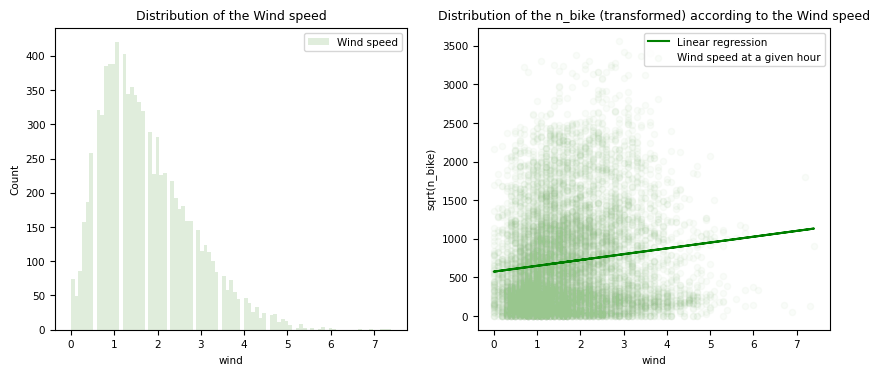

In [173]:
N = len(df) // 100

# Wind speed distributions
ax = plt.subplot2grid((1, 2), (0, 0), colspan=1)
ax.hist(x=df.Windspeed, bins=N, color='#99C68E', alpha=0.3, label='Wind speed')
# add legends
ax.set_title('Distribution of the Wind speed')
ax.set_xlabel('wind')
ax.set_ylabel('Count')
ax.legend()

# Wind speed and rented bikes distribution
ax = plt.subplot2grid((1, 2), (0, 1), colspan=1)
df.plot(x='Windspeed', y='RBC', kind='scatter', color='#99C68E', alpha=0.05, label='Wind speed at a given hour', ax=ax)
# add regression line
x, y = df.Windspeed, df.RBC
m, b = np.polyfit(x, y, 1)
ax.plot(x, m * x + b, color='#008000', label='Linear regression') 
# add legends
ax.set_title('Distribution of the n_bike (transformed) according to the Wind speed')
ax.set_xlabel('wind')
ax.set_ylabel('sqrt(n_bike)')
ax.legend()
plt.savefig('./img/corr/Wind_subplot.jpg', dpi=300)

pass

<AxesSubplot:xlabel='Windspeed', ylabel='Density'>

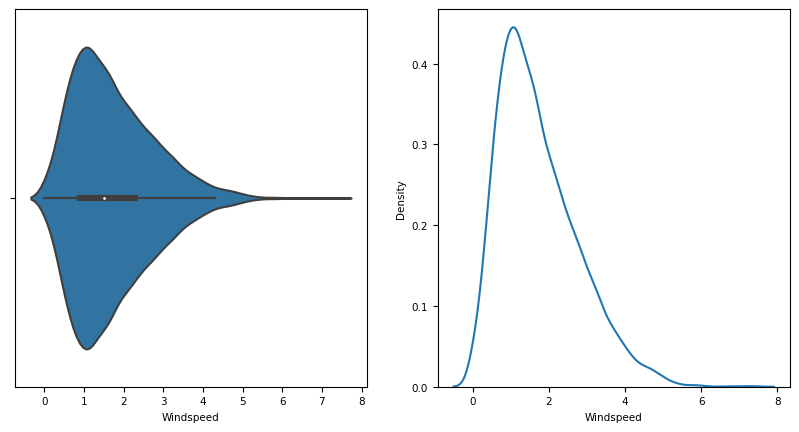

In [174]:
fig,ax = plt.subplots(1,2,figsize = (10,5))
sns.violinplot(ax =ax[0],x=df['Windspeed'])
sns.kdeplot(ax = ax[1],x=df['Windspeed'])

I expected to see that the wind speed will lead to less bikes rented but it is the opposite. I am suprised of this result but I can suppose it was not depending only on the wind but with crossed features, or maybe the wind can be confortable for the rider in some mesure. I also see that the wind speed has a right skewed distribution. So I will apply a log-transform on this feature.


In [175]:
df['Windspeed'] = np.log(df['Windspeed'] + 1)

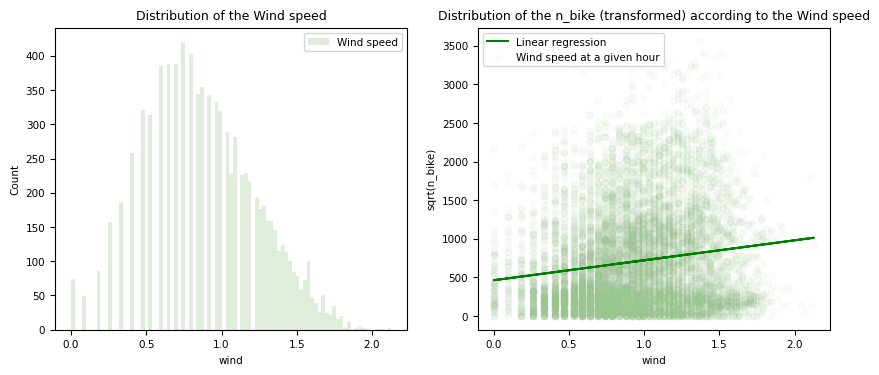

In [176]:
N = len(df) // 100

# Wind speed distributions
ax = plt.subplot2grid((1, 2), (0, 0), colspan=1)
ax.hist(x=df.Windspeed, bins=N, color='#99C68E', alpha=0.3, label='Wind speed')
# add legends
ax.set_title('Distribution of the Wind speed')
ax.set_xlabel('wind')
ax.set_ylabel('Count')
ax.legend()

# Wind speed and rented bikes distribution
ax = plt.subplot2grid((1, 2), (0, 1), colspan=1)
df.plot(x='Windspeed', y='RBC', kind='scatter', color='#99C68E', alpha=0.05, label='Wind speed at a given hour', ax=ax)
# add regression line
x, y = df.Windspeed, df.RBC
m, b = np.polyfit(x, y, 1)
ax.plot(x, m * x + b, color='#008000', label='Linear regression') 
# add legends
ax.set_title('Distribution of the n_bike (transformed) according to the Wind speed')
ax.set_xlabel('wind')
ax.set_ylabel('sqrt(n_bike)')
ax.legend()
plt.savefig('./img/corr/Wind_subplot.jpg', dpi=300)

pass

bikes tend to be rented around the normal wind speed limits, however it has some outliers around very high wind speed.
wind speed doesnt seem to follow some trend. As expected at higher wind speed less people take bikes.


In [177]:
plt.rcParams['figure.figsize'] = [6, 4] # default = [6.0, 4.0]
plt.rcParams['figure.dpi']     = 100     # default = 72.0
plt.rcParams['font.size']      = 7.5     # default = 10.0

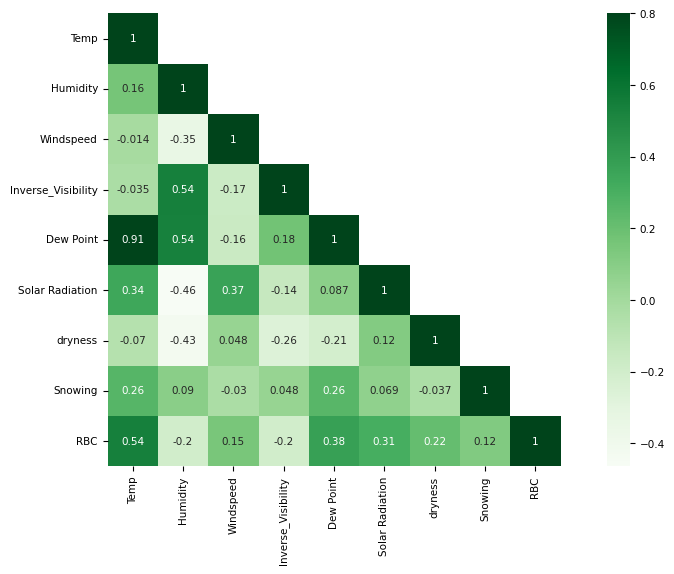

In [178]:
corrMatt = df[['Temp', 'Humidity', 'Windspeed', 'Inverse_Visibility',
       'Dew Point', 'Solar Radiation', 'dryness', 'Snowing', 'RBC']].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(12,6)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True, cmap="Greens");
plt.savefig('./img/corr/Corr_matr.jpg', dpi=300)

In [179]:
num_features = df[['RBC', 'Temp', 'Humidity', 'Windspeed', 'Inverse_Visibility', 'Solar Radiation', 
                   'dryness', 'Snowing']]

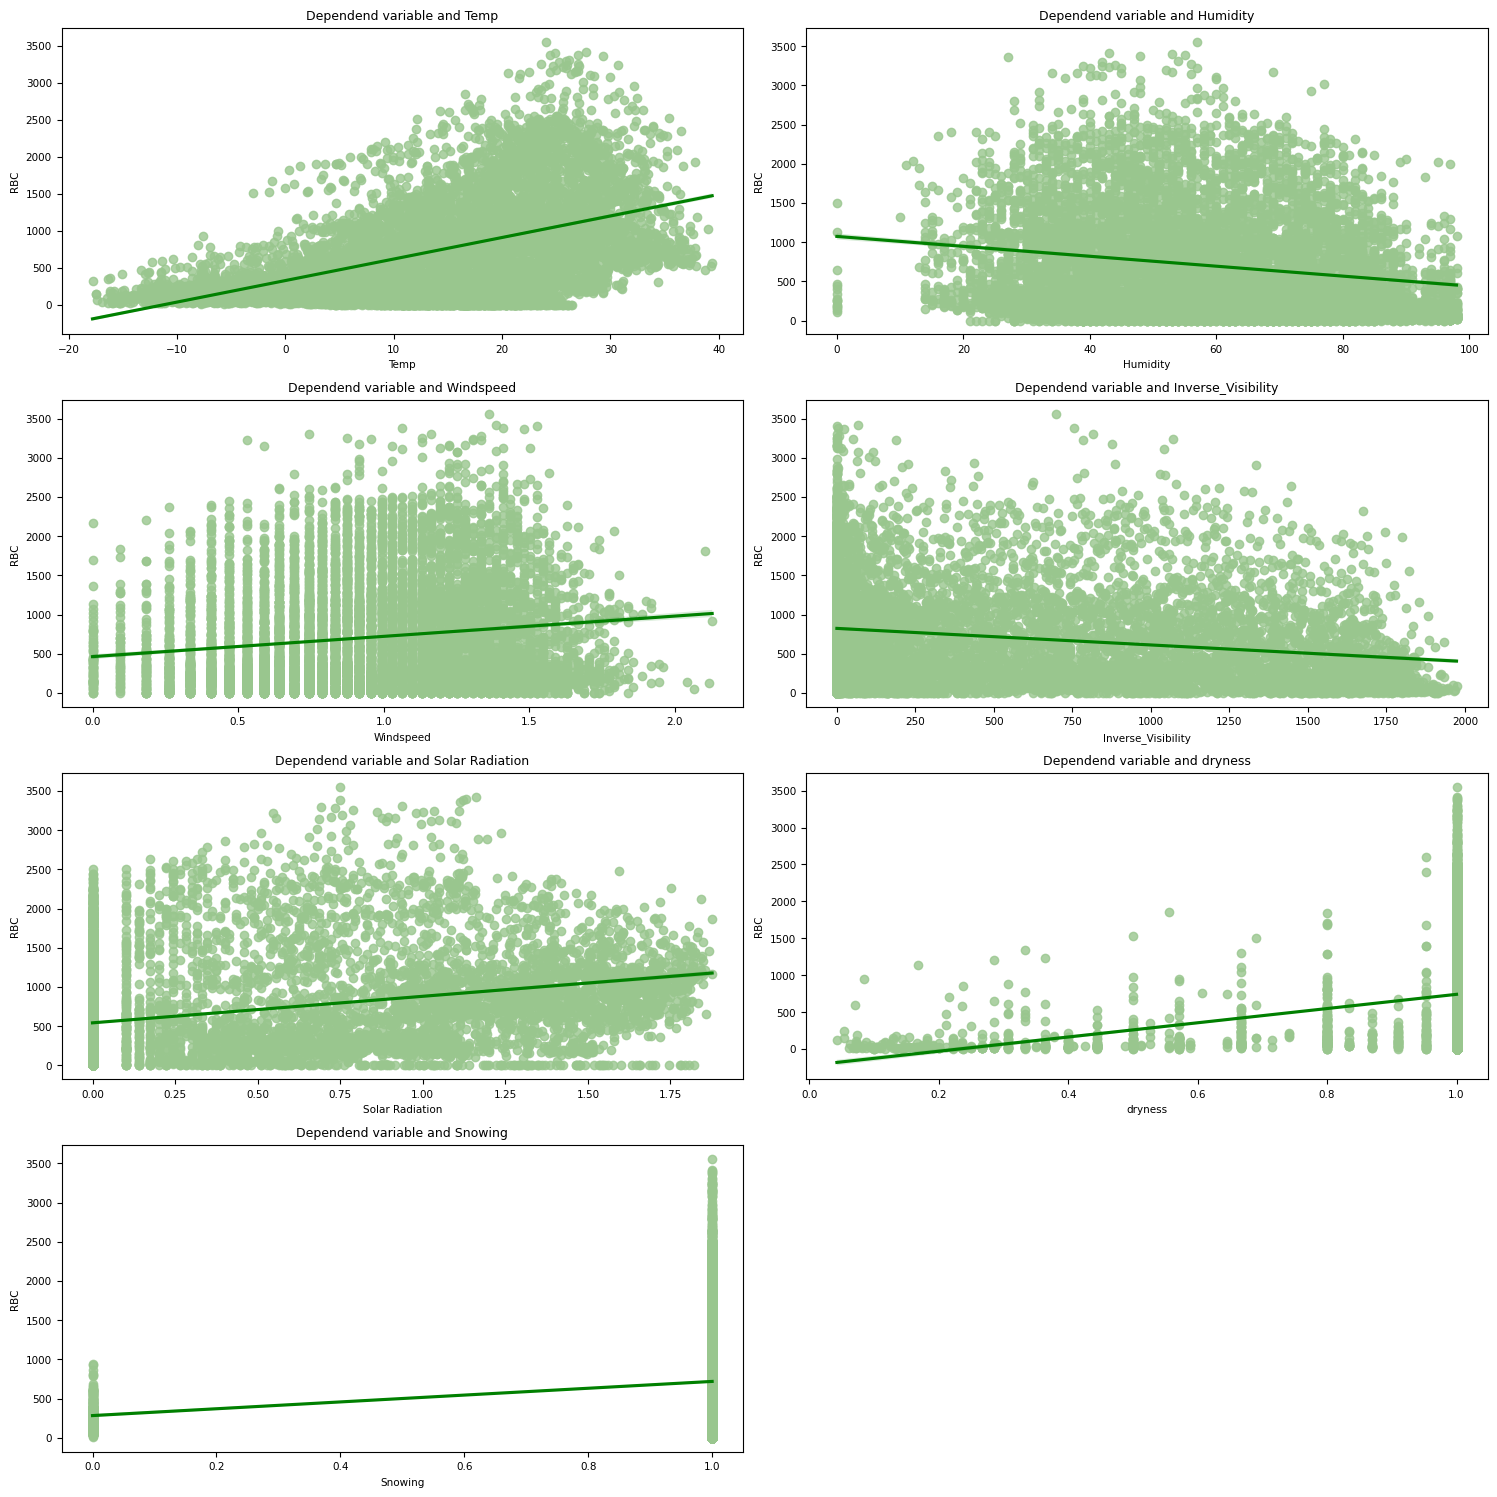

In [182]:
n=1
plt.figure(figsize=(15,15))
for i in num_features.columns:
    if i == 'RBC':
        pass
    else:
        plt.subplot(4,2,n)
        n+=1
        sns.regplot(df[i], df['RBC'],scatter_kws={"color": "#99C68E"}, line_kws={"color": "#008000"})
        plt.title(f'Dependend variable and {i}')
        plt.tight_layout()
        plt.savefig('./img/corr/Corr_var.jpg', dpi=300)
